In [1]:
#The sns.set_style sets the aesthetics of the plot 
#%config InlineBackend figure_format = ‘retina’  makes the plot higher resolution. 
#%matplotlib inline is a magic function that tells Matplotlib to generate our plots within the frontend 
import pandas as pan
import numpy as npy
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
%config InlineBackend.figure_format = 'retina'

In [4]:
fit = pan.read_csv('FitBit data.csv')
fit.head(10)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,3/25/2016,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819
1,1503960366,3/26/2016,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154
2,1503960366,3/27/2016,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944
3,1503960366,3/28/2016,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932
4,1503960366,3/29/2016,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886
5,1503960366,3/30/2016,10970,7.16,7.16,0.0,2.36,0.51,4.29,0.0,30,13,223,1174,1820
6,1503960366,3/31/2016,12256,7.86,7.86,0.0,2.29,0.49,5.04,0.0,33,12,239,820,1889
7,1503960366,4/1/2016,12262,7.87,7.87,0.0,3.32,0.83,3.64,0.0,47,21,200,866,1868
8,1503960366,4/2/2016,11248,7.25,7.25,0.0,3.00,0.45,3.74,0.0,40,11,244,636,1843
9,1503960366,4/3/2016,10016,6.37,6.37,0.0,0.91,1.28,4.18,0.0,15,30,314,655,1850


In [5]:
# first step is to clean the data and remove unnecessary columns
del_col = ['TrackerDistance','ModeratelyActiveDistance','LightActiveDistance','SedentaryActiveDistance','SedentaryMinutes','LightlyActiveMinutes','FairlyActiveMinutes','LoggedActivitiesDistance']
fit = fit.drop(del_col,axis = 1)
fit.head()

,Id,ActivityDate,TotalSteps,TotalDistance,VeryActiveDistance,VeryActiveMinutes,Calories
0,1503960366,3/25/2016,11004,7.11,2.57,33,1819
1,1503960366,3/26/2016,17609,11.55,6.92,89,2154
2,1503960366,3/27/2016,12736,8.53,4.66,56,1944
3,1503960366,3/28/2016,13231,8.93,3.19,39,1932
4,1503960366,3/29/2016,12041,7.85,2.16,28,1886


In [6]:
#  dropping the duplicates from the list.
print(fit.shape)
fit = fit.drop_duplicates(keep='first')
print(fit.shape)

(457, 7)
(457, 7)


In [7]:
#finding datatypes from the list
fit.dtypes

Id                      int64
ActivityDate           object
TotalSteps              int64
TotalDistance         float64
VeryActiveDistance    float64
VeryActiveMinutes       int64
Calories                int64
dtype: object

In [8]:
#1.Finding the maximum number of steps in the data
steps = fit['TotalSteps'].max()
steps


28497

In [9]:
#2.Findind the top most 5 veryactivedistance in the list
fit = fit.sort_values(by ='VeryActiveDistance', ascending=False).head()
fit

,Id,ActivityDate,TotalSteps,TotalDistance,VeryActiveDistance,VeryActiveMinutes,Calories
454,8877689391,4/10/2016,28497,27.530001,21.92,128,4526
391,8053475328,4/3/2016,25701,20.139999,16.82,165,3697
446,8877689391,4/2/2016,27572,23.389999,14.72,116,4220
450,8877689391,4/6/2016,24136,20.910000,12.22,87,4039
390,8053475328,4/2/2016,20188,15.620000,12.06,124,3377


In [10]:
#3.Finding the minimum and maximum in totaldistance using function
def min_max(col):
    
    top = fit[col].idxmax()
    top_df = pan.DataFrame(fit.loc[top])
    
    bottom = fit[col].idxmin()
    bottom_df = pan.DataFrame(fit.loc[bottom])
    
    final = pan.concat([top_df, bottom_df], axis=1)
    return final

min_max('TotalDistance')

,454,390
Id,8877689391,8053475328
ActivityDate,4/10/2016,4/2/2016
TotalSteps,28497,20188
TotalDistance,27.53,15.62
VeryActiveDistance,21.92,12.06
VeryActiveMinutes,128,124
Calories,4526,3377


In [11]:
#4. Average number of calories
fit['Calories'].mean()
min_max('Calories')

,454,390
Id,8877689391,8053475328
ActivityDate,4/10/2016,4/2/2016
TotalSteps,28497,20188
TotalDistance,27.53,15.62
VeryActiveDistance,21.92,12.06
VeryActiveMinutes,128,124
Calories,4526,3377


In [12]:
#5.finding steps more than 20000
fit[fit['TotalSteps'] >= 20000]

,Id,ActivityDate,TotalSteps,TotalDistance,VeryActiveDistance,VeryActiveMinutes,Calories
454,8877689391,4/10/2016,28497,27.530001,21.92,128,4526
391,8053475328,4/3/2016,25701,20.139999,16.82,165,3697
446,8877689391,4/2/2016,27572,23.389999,14.72,116,4220
450,8877689391,4/6/2016,24136,20.910000,12.22,87,4039
390,8053475328,4/2/2016,20188,15.620000,12.06,124,3377


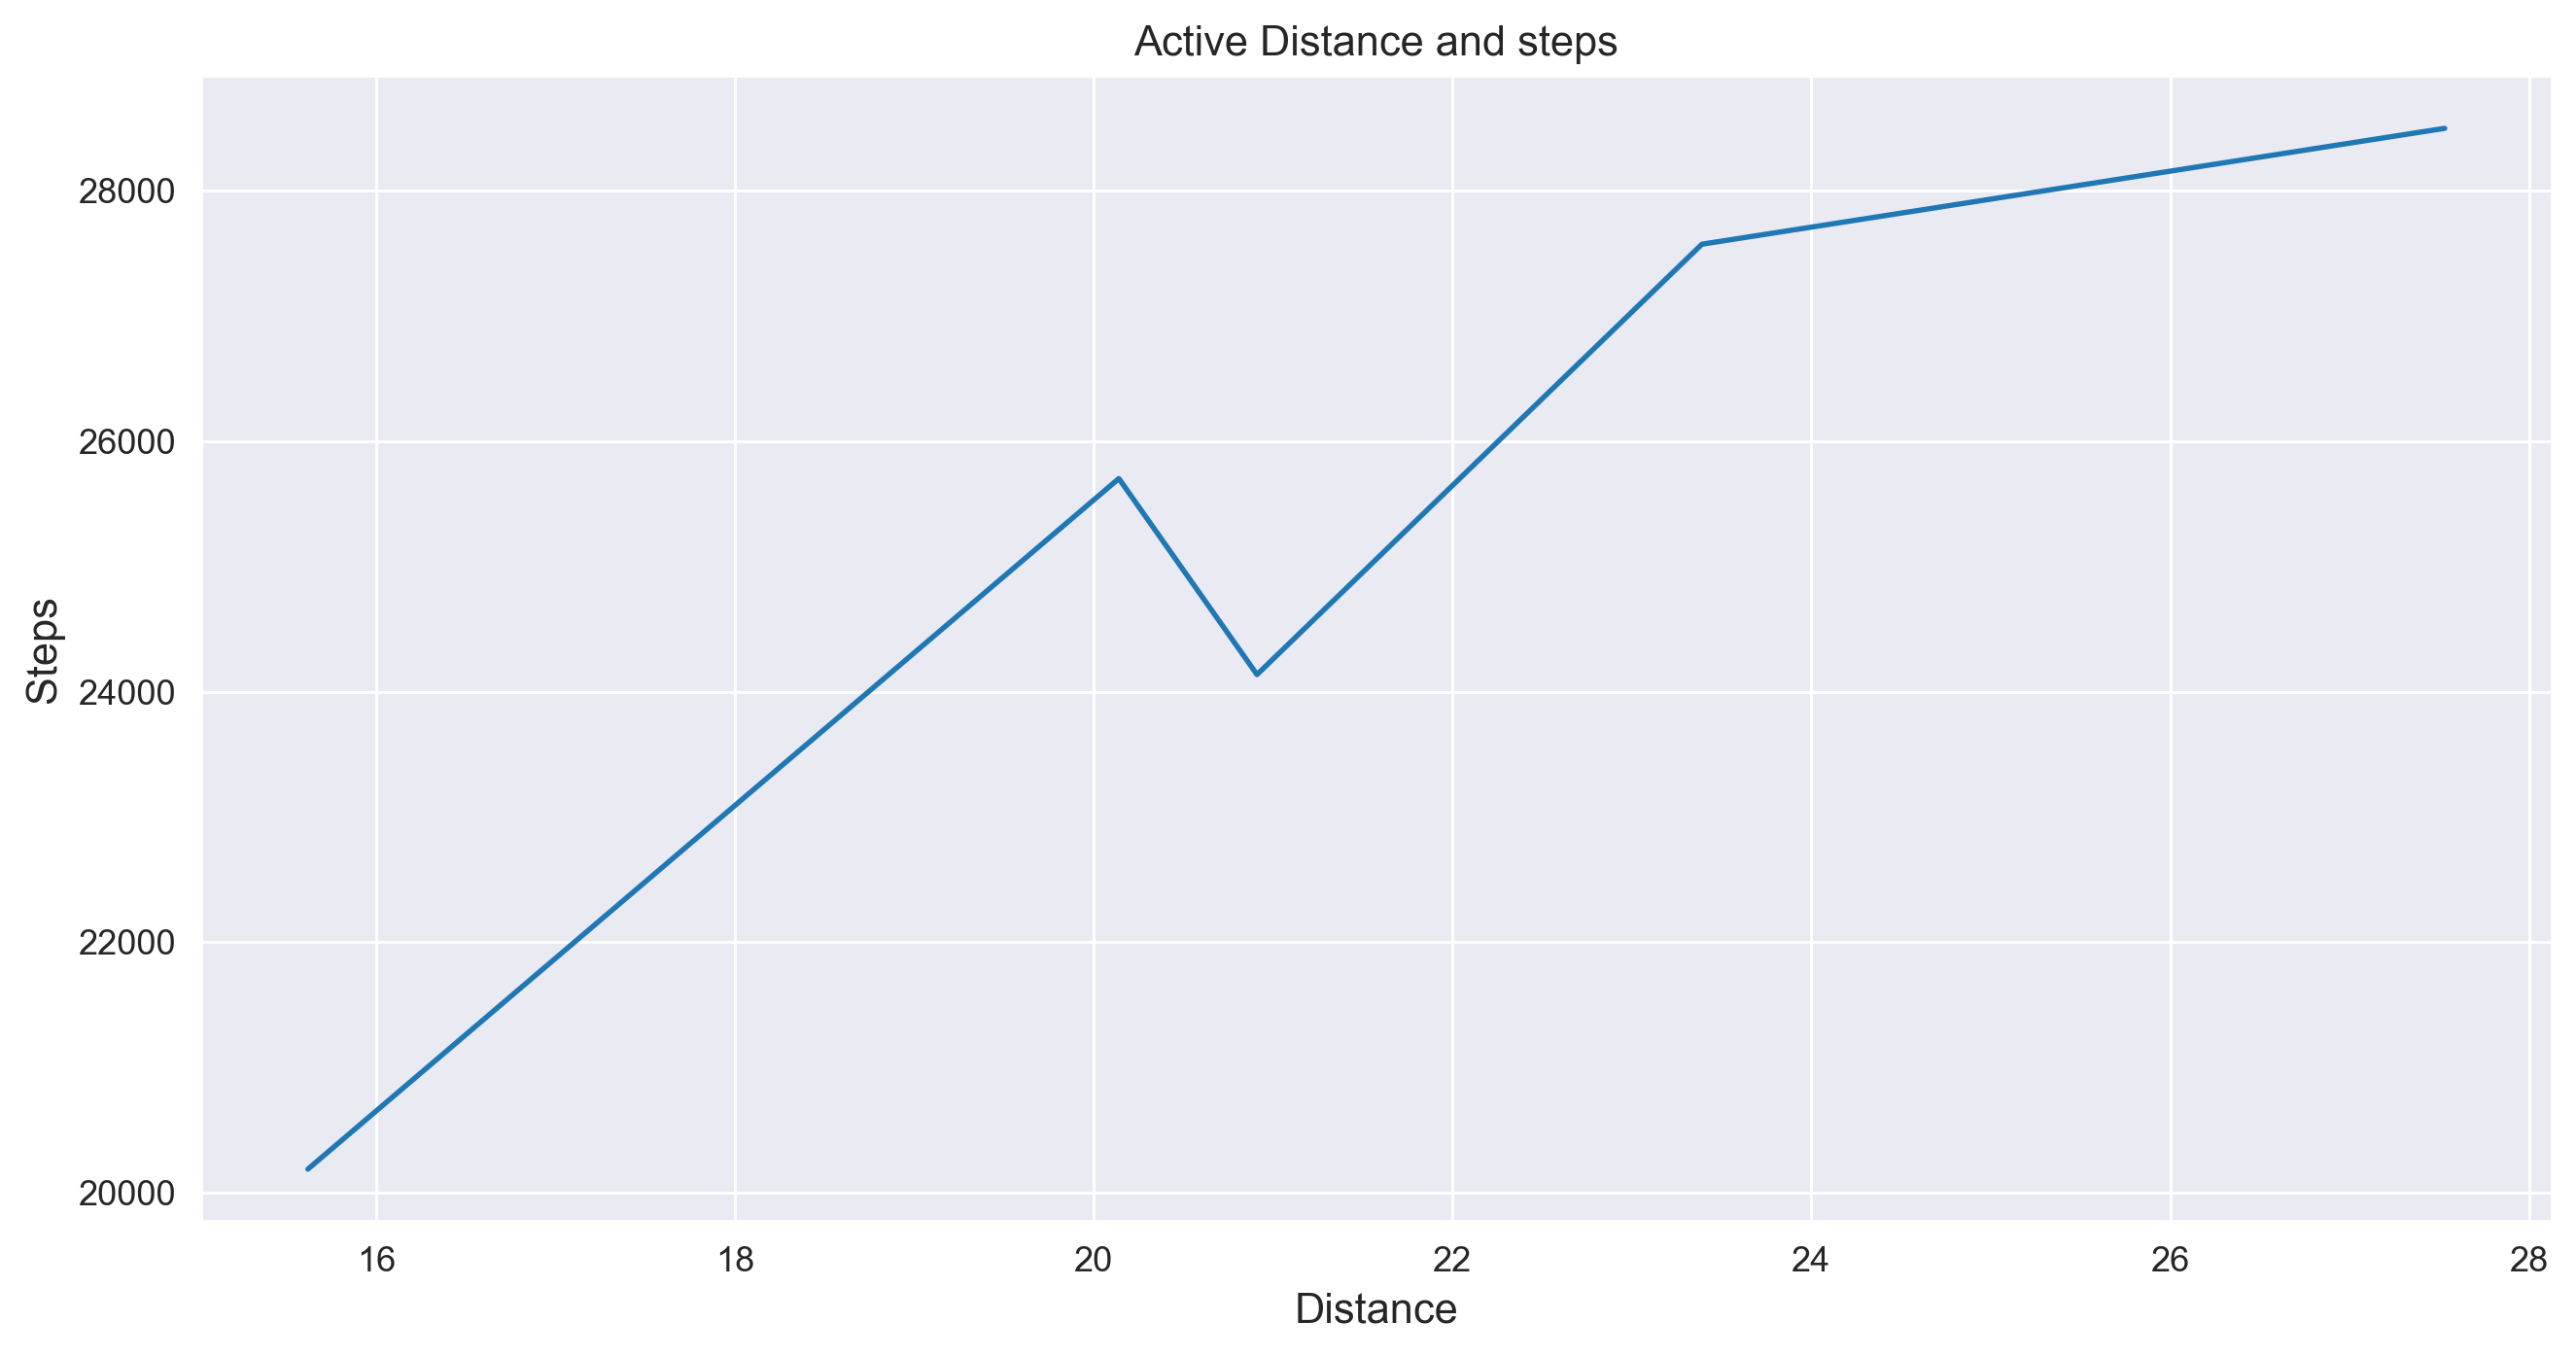

In [13]:
#data visualization
#figure size(width, height)
total_activity = fit.groupby('TotalDistance')['TotalSteps'].sum()
plt.figure(figsize=(12,6), dpi = 130)
plt.xlabel('Distance', fontsize = 12)
plt.ylabel('Steps', fontsize = 12)
plt.title('Active Distance and steps')
plt.plot(total_activity)
plt.show()

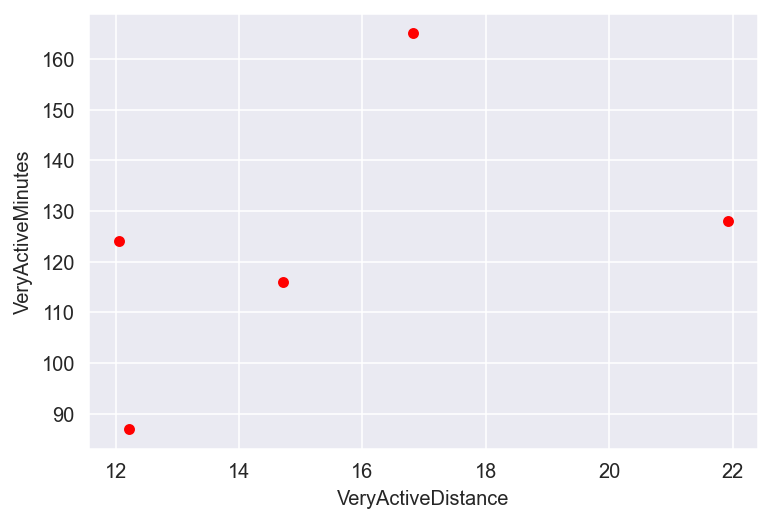

In [14]:
#plotting the graph in scatter
fit.plot(kind='scatter',x='VeryActiveDistance',y='VeryActiveMinutes',color='red')
plt.show()

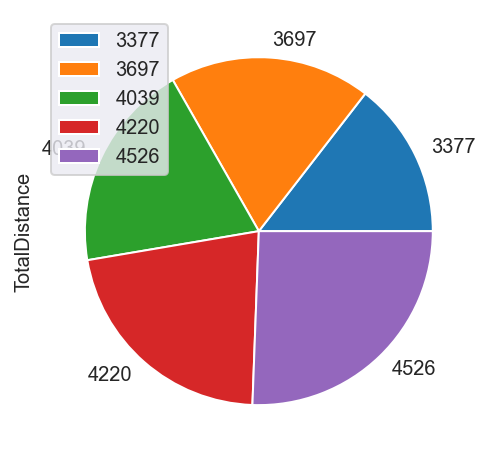

In [15]:
#plotting in pie chart
fit.groupby(['Calories']).sum().plot(kind='pie', y='TotalDistance')

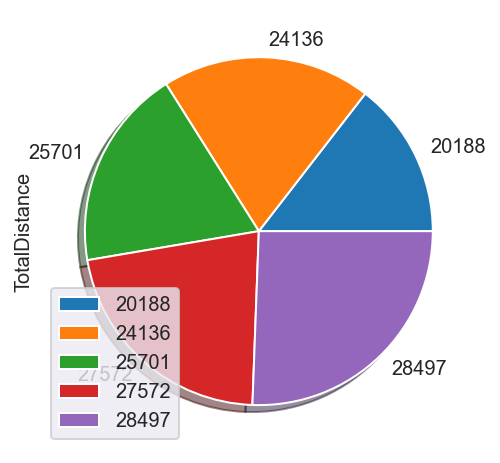

In [16]:
#pie chart in shadow effect
fit.groupby(['TotalSteps']).sum().plot(kind='pie', y='TotalDistance', shadow = True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000207DF3A67C0>,
      dtype=object)

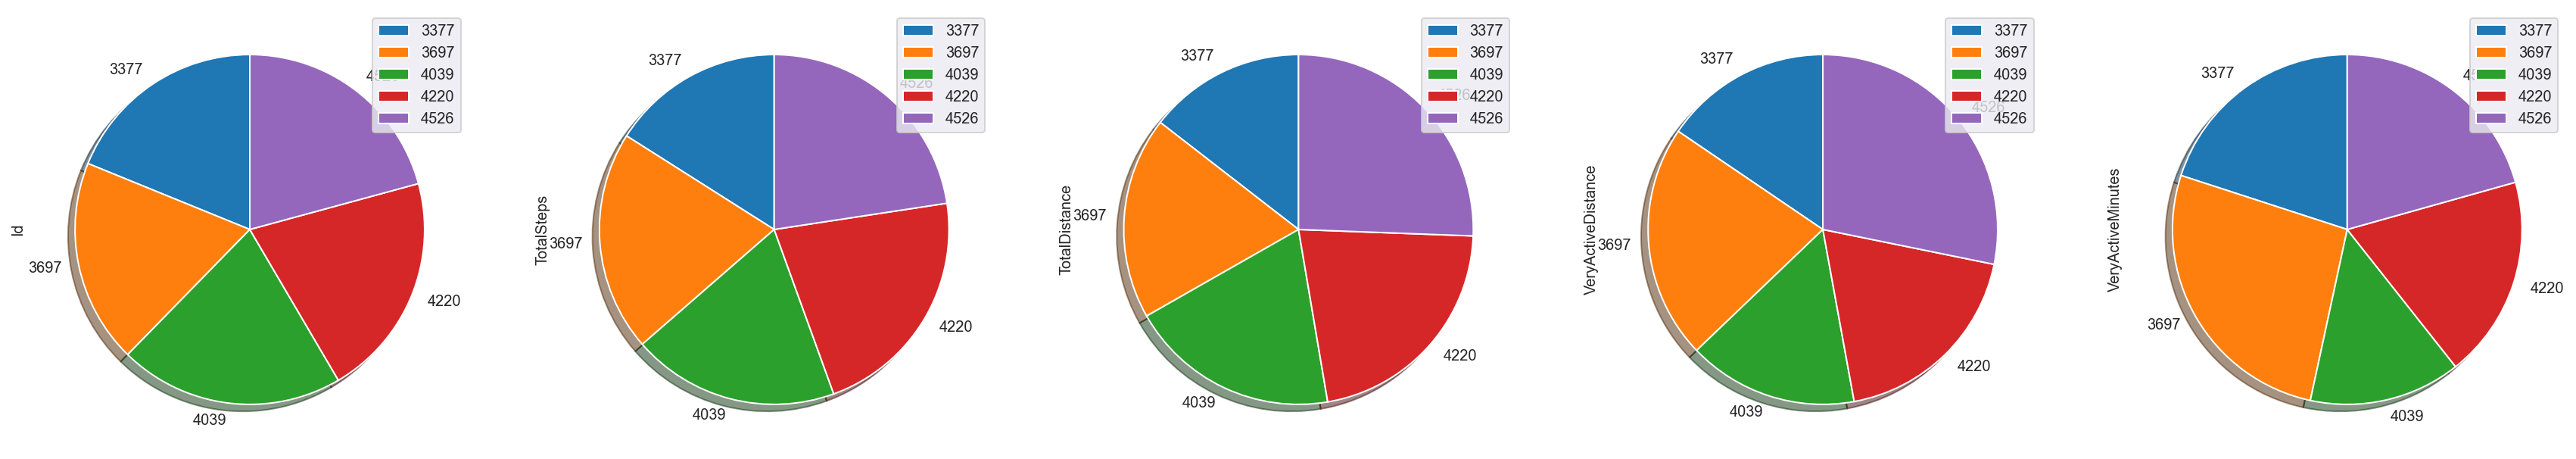

In [17]:
#pie chart using subplots,shadow,startangle
fit.groupby(['Calories']).sum().plot(kind='pie', subplots=True, shadow = True,startangle=90,figsize=(30,30))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000207E3EBB640>,
      dtype=object)

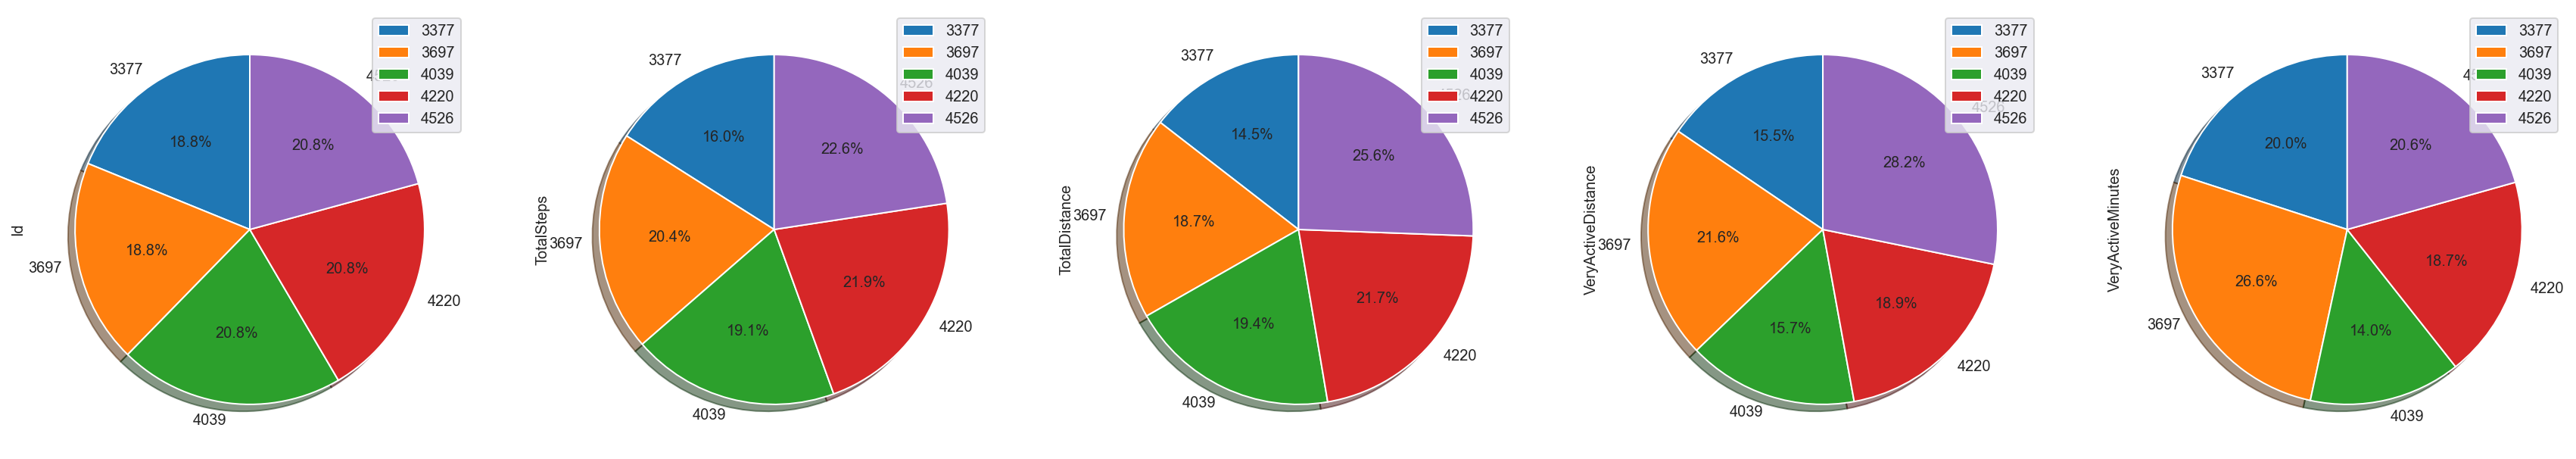

In [18]:
#displaying percentage to the chart
fit.groupby(['Calories']).sum().plot(kind='pie', subplots=True, shadow = True,startangle=90,figsize=(30,30),autopct='%1.1f%%')